## Import utils

In [1]:
%run utils.py

In [2]:
%pylab inline

//anaconda/envs/py2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy

In [4]:
# parameters for histograms
hist_kw = dict(bins=100, normed=True, alpha=0.5)

# CvM investigation

The mass and several predictions are generated to see the CvM metric:

* mass from 1000 * exp(1), range=(0, 4000);
* prediction_sin = sin(mass / 1000.)
* prediction_rand = numpy.random.random
* prediction_cut = zeros outside [1000, 1500] mass region and ones in this region

In [5]:
mass = 1000 * numpy.random.exponential(1, size=10000)
mass = mass[mass < 4000]
prediction_cut = numpy.zeros(len(mass))
prediction_cut[(mass > 1000) & (mass < 1500)] = 1
prediction_rand = numpy.random.random(len(mass))
prediction_sin = numpy.sin(mass / 1000.)

## Plot:
* mass histogram
* mass histogram for each prediction selection > 0.5

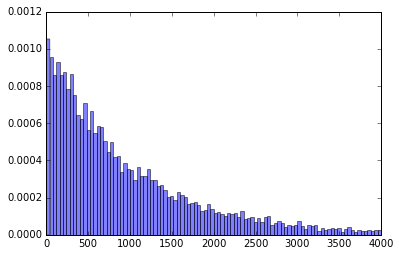

In [6]:
hist(mass, **hist_kw)
pass

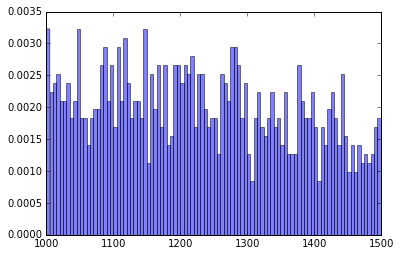

In [7]:
hist(mass[prediction_cut > 0.5], **hist_kw)
pass

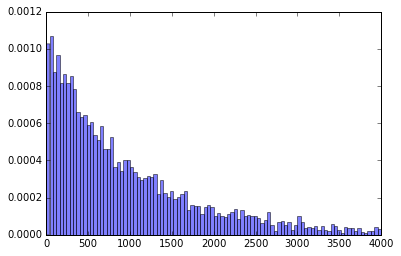

In [8]:
hist(mass[prediction_rand > 0.5], **hist_kw)
pass

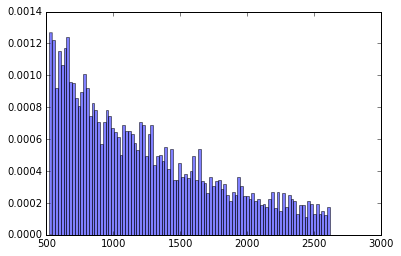

In [9]:
hist(mass[prediction_sin > 0.5], **hist_kw)
pass

### For which prediction does selection change initial pdf? Check your thoughts using CvM metric.

#### What predictions always must be uncorrelated with the mass? 

CvM metric can be calculated using:

* `from utils import compute_cvm`
* `compute_cvm(predictions, mass)`

For CvM metric we haven't statistic like KS statistic to test hypothesis, that is why only pdf generation can help.

In [10]:
from utils import compute_cvm
# compute cvm for all predictions

Generate CvM metric distribution using appropriate distribution for predicitons generation.

**Random predictions always are uncorellated with the mass**

In [11]:
def generate_cvm_pdf(mass, points=5000):
    cvm = []
    # for each point 
    for step in range(points):
        prediction_rand = numpy.random.random(len(mass))
        cvm.append(compute_cvm(prediction_rand, mass))
    return numpy.array(cvm)

In [12]:
cvm_pdf = generate_cvm_pdf(mass)

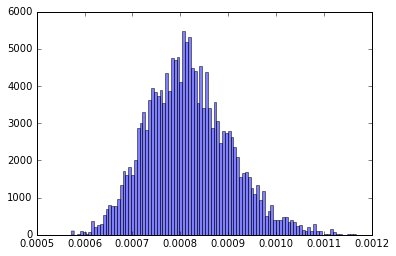

In [13]:
hist(cvm_pdf, **hist_kw)
pass

Compute p-value to check correlation

In [14]:
model_corr = compute_cvm(prediction_cut, mass)
print 'Correlation', model_corr, 'p-value', numpy.mean(cvm_pdf > model_corr)


model_corr = compute_cvm(prediction_rand, mass)
print 'Correlation', model_corr, 'p-value', numpy.mean(cvm_pdf > model_corr)


model_corr = compute_cvm(prediction_sin, mass)
print 'Correlation', model_corr, 'p-value', numpy.mean(cvm_pdf > model_corr)

Correlation 0.149660526789 p-value 0.0
Correlation 0.000771032048412 p-value 0.687
Correlation 0.157371432721 p-value 0.0


# Classifiers training:
## check influence of the correlation restriction on the quality

Download 

* `training.csv`, 
* `check_correlation.csv`, 

to the folder `datasets/` from https://www.kaggle.com/c/flavours-of-physics/data

In [15]:
import pandas
data = pandas.read_csv('datasets/training.csv')
data_correlation = pandas.read_csv('datasets/check_correlation.csv')

In [16]:
data.head()

,id,LifeTime,dira,FlightDistance,FlightDistanceError,IP,IPSig,VertexChi2,pt,DOCAone,...,p1_p,p2_p,p0_eta,p1_eta,p2_eta,SPDhits,production,signal,mass,min_ANNmuon
0,18453471,0.001578,0.999999,14.033335,0.681401,0.016039,0.451886,1.900433,1482.037476,0.066667,...,12290.760742,39264.398438,3.076006,4.003800,4.031514,458,-99,0,1866.300049,0.277559
1,5364094,0.000988,0.999705,5.536157,0.302341,0.142163,9.564503,0.865666,3050.720703,0.024022,...,16562.667969,7341.257812,3.228553,2.786543,2.975564,406,-99,0,1727.095947,0.225924
2,11130990,0.000877,0.999984,6.117302,0.276463,0.034746,1.970751,10.975849,3895.908691,0.055044,...,22695.388672,10225.309570,3.536903,2.865686,3.052810,196,-99,0,1898.588013,0.368630
3,15173787,0.000854,0.999903,5.228067,0.220739,0.076389,4.271331,3.276358,4010.781738,0.053779,...,16909.515625,9141.426758,3.087461,3.218034,2.375592,137,-99,0,1840.410034,0.246045
4,1102544,0.001129,0.999995,39.069534,1.898197,0.120936,4.984982,0.468348,4144.546875,0.004491,...,97612.804688,47118.785156,4.632295,4.711155,4.296878,477,-99,0,1899.793945,0.222060


In [17]:
data_correlation.head()

,id,LifeTime,dira,FlightDistance,FlightDistanceError,IP,IPSig,VertexChi2,pt,DOCAone,...,p1_pt,p2_pt,p0_p,p1_p,p2_p,p0_eta,p1_eta,p2_eta,SPDhits,mass
0,11120335,0.000703,0.999715,2.927074,0.214014,0.081302,4.259793,1.066585,3108.189941,0.010767,...,1294.450928,1073.976440,9274.671875,7963.914062,6712.897949,2.783731,2.503310,2.519349,280,1723.887939
1,11495369,0.000601,0.999950,15.849142,0.842973,0.182213,13.882857,5.780046,6858.264648,0.007574,...,3981.284912,1859.680542,22844.791016,109955.101562,37051.800781,3.660059,4.011287,3.684429,386,1926.284058
2,7098902,0.002009,0.999984,43.358494,1.323199,0.200158,12.870687,3.460782,3604.347412,0.052849,...,2564.430420,354.095032,45214.070312,77265.429688,12087.007812,4.458619,4.098382,4.223254,433,1830.873047
3,8103692,0.001268,0.999550,6.910733,0.198652,0.167730,8.559438,7.676139,3240.960449,0.101368,...,1178.332031,1285.701660,11245.551758,6770.969238,17003.119141,3.060873,2.434033,3.273807,245,1909.119019
4,10160864,0.001937,0.999996,36.135208,0.508036,0.097170,9.295684,0.426340,6448.445312,0.007005,...,3140.512207,385.343475,48171.457031,43973.835938,7368.522949,3.441606,3.331079,3.643300,489,1600.925049


In [18]:
train_features = list(set(data_correlation.columns) - {'id'})
train_features_wo_mass = list(set(data_correlation.columns) - {'id', 'mass'})

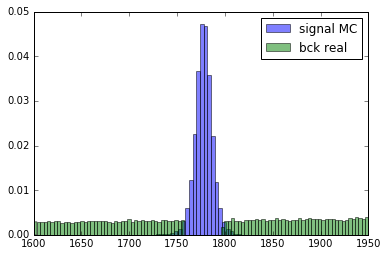

In [19]:
hist(data[data.signal == 1]['mass'].values, label='signal MC', **hist_kw)
hist(data[data.signal == 0]['mass'].values, label='bck real', **hist_kw)
xlim(1600, 1950)
legend()

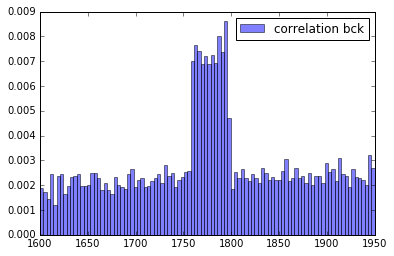

In [20]:
hist(data_correlation['mass'].values, label='correlation bck', **hist_kw)
legend()

### TODO:

* Train any linear model and ensemble model on `train_features`.
* Are models are correlated with the mass?
* Compute the AUC for the models
* Are they have essential difference?
* Use feature `(mass - mass.mean())**2` instead of `mass`. How does it infuence on the models?

In [21]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [22]:
# Divide train on train, test
train_index, test_index = train_test_split(range(len(data)))
train = data.iloc[train_index, :]
test = data.iloc[test_index, :]

In [23]:
# generate cvm pdf
tau_cvm = generate_cvm_pdf(data_correlation.mass.values)

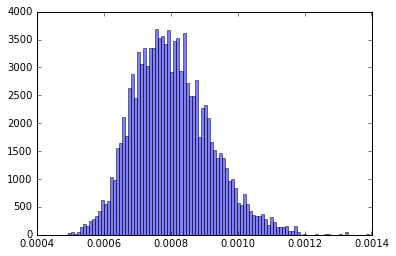

In [24]:
hist(tau_cvm, **hist_kw)
pass

In [25]:
# define function to test model on cvm and calculate quality
def test_model(model, features, cvm_pdf):
    model_cvm = model.predict_proba(data_correlation[features])[:, 1]
    model_corr = compute_cvm(model_cvm, data_correlation.mass.values)
    print 'Correlation', model_corr, 'p-value', numpy.mean(cvm_pdf > model_corr)
    print 'AUC', roc_auc_score(test.signal.values, model.predict_proba(test[features])[:, 1])

In [26]:
# train ensemble
# test on correlation and quality
gbc = GradientBoostingClassifier()
gbc.fit(train[train_features], train.signal)

test_model(gbc, train_features, tau_cvm)

Correlation 0.0886676690845 p-value 0.0
AUC 0.999330937084


In [27]:
import sklearn
# train linear model
# test on correlation and quality
lr = sklearn.linear_model.LogisticRegression()
lr.fit(train[train_features], train.signal)

test_model(lr, train_features, tau_cvm)

Correlation 0.00131684580529 p-value 0.0006
AUC 0.9107304433


#### Add new feature for linear model

In [28]:
train['mean'] = (train.mass.values - train.mass.mean())**2
test['mean'] = (test.mass.values - train.mass.mean())**2
data_correlation['mean'] = (data_correlation.mass.values - train.mass.mean())**2

/anaconda/envs/py2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/envs/py2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


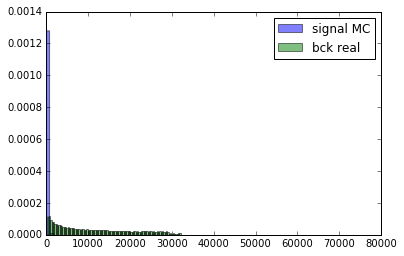

In [29]:
hist(train[train.signal == 1]['mean'].values, label='signal MC', **hist_kw)
hist(train[train.signal == 0]['mean'].values, label='bck real', **hist_kw)
# xlim(1600, 1950)
legend()

In [30]:
new_train_features = train_features_wo_mass + ["mean"]

In [31]:
# train ensemble using new feature
# test on correlation and quality
gbc_2 = GradientBoostingClassifier()
gbc_2.fit(train[new_train_features], train.signal)

test_model(gbc_2, new_train_features, tau_cvm)

Correlation 0.10097811556 p-value 0.0
AUC 0.999290373812


In [32]:
# train linear using new feature
# test on correlation and quality
lr_2 = sklearn.linear_model.LogisticRegression()
lr_2.fit(train[new_train_features], train.signal)

test_model(lr_2, new_train_features, tau_cvm)

Correlation 0.137683946833 p-value 0.0
AUC 0.995470099249


Result: Correlation is highly increased whith this feature.

### How does shape of the mass in correlation dataset change depending on models' thresholds?

In [33]:
def compare_shape(model, features):
    probs = model.predict_proba(data_correlation[features])[:, 1]
    hist_kw['bins'] = 30
    for thr in [0.001, 0.05, 0.1, 0.5]:
        hist(data_correlation[probs > thr]['mass'].values, label='thr=%1.2f' %thr, **hist_kw)
    legend()

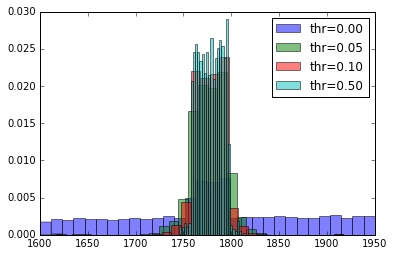

In [34]:
compare_shape(gbc, train_features)

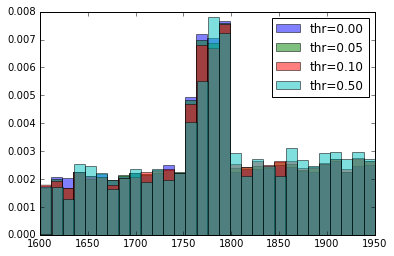

In [35]:
compare_shape(lr, train_features)

Result: We have more bias for masses around mean mass.

## How the feature bagging and events bagging affect the CvM and quality?

In [36]:
# train the same ensemble using another max_features
for max_features in [20, 15, 10, 5]:
    gbc_2 = GradientBoostingClassifier(max_features=max_features)
    gbc_2.fit(train[train_features], train.signal)
    print "max_features: {}".format(max_features)
    test_model(gbc_2, train_features, tau_cvm)

max_features: 20
Correlation 0.087145382565 p-value 0.0
AUC 0.999362242806
max_features: 15
Correlation 0.0814817001594 p-value 0.0
AUC 0.99932384112
max_features: 10
Correlation 0.0751504419452 p-value 0.0
AUC 0.999015181606
max_features: 5
Correlation 0.0672336015391 p-value 0.0
AUC 0.99815030885


In [37]:
# train the same ensemble using another subsample
for subsample in [0.2, 0.5, 0.9]:
    gbc_2 = GradientBoostingClassifier(subsample=subsample)
    gbc_2.fit(train[train_features], train.signal)
    print "subsample: {}".format(subsample)
    test_model(gbc_2, train_features, tau_cvm)

subsample: 0.2
Correlation 0.0872450359341 p-value 0.0
AUC 0.998777809693
subsample: 0.5
Correlation 0.0863474323097 p-value 0.0
AUC 0.999375778804
subsample: 0.9
Correlation 0.0880532884994 p-value 0.0
AUC 0.9993526722


Result: 
Increasing max_features increase correlation.
subsample: 0.5 - is optimal for both correlation and AUC.

## Produce new feature from mass to use it in training and make cvm much lower.

In [59]:
train['big_diff'] = train.mass.values > train.mass.mean()
test['big_diff'] = test.mass.values > train.mass.mean()
data_correlation['big_diff'] = data_correlation.mass.values > train.mass.mean()

new_train_features = train_features_wo_mass + ['big_diff']

/anaconda/envs/py2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/envs/py2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [60]:
gbc_2 = GradientBoostingClassifier(subsample = 0.5, max_features = 20)
gbc_2.fit(train[new_train_features], train.signal)

test_model(gbc_2, new_train_features, tau_cvm)

Correlation 0.00148616622323 p-value 0.0
AUC 0.942608054086


**Note:** In the competition cvm 0.002 threshold is set. Your model should pass it.

### Answer the question: 
* What quality can you get if `mass` is not used in the training? Is it different? Then why? 
* What model is better, linear or ensemble? Compare their cvm.

In [40]:
# train ensemble without mass
# test on correlation and quality
gbc_2 = GradientBoostingClassifier()
gbc_2.fit(train[train_features_wo_mass], train.signal)

test_model(gbc_2, train_features_wo_mass, tau_cvm)

Correlation 0.00105162106269 p-value 0.028
AUC 0.942619003635


In [41]:
# train linear model without mass
# test on correlation and quality
lr_2 = sklearn.linear_model.LogisticRegression()
lr_2.fit(train[train_features_wo_mass], train.signal)

test_model(lr_2, train_features_wo_mass, tau_cvm)

Correlation 0.000938683747652 p-value 0.1238
AUC 0.908014388647


## Example

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier(n_estimators=3)
rf.fit(train[train_features_wo_mass], train['signal'].values)
test_model(rf, train_features_wo_mass, tau_cvm)

Correlation 0.0191704913162 p-value 0.0
AUC 0.874089189824


## Explain why this model is correlated with the mass, although mass feature is absent in training sample?

In [53]:
roc_auc_score(train.signal.values, rf.predict_proba(train[train_features_wo_mass])[:, 1])

0.99059227799490757

Other feature has some dependance on mass, so even without mass model has correlation with it.